# modeling

In [1]:
import pandas as pd

## Loading the data

In [2]:
penguin_df = pd.read_csv("penguins.csv")
print(penguin_df.head())
penguin_df.dropna(inplace=True)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


## Defining the output and feature variables

In [3]:
# Encode the output labels
# output = penguin_df["species"]
output, uniques = pd.factorize(penguin_df["species"])
print("Class mapping (species to numeric):", list(enumerate(uniques)))

Class mapping (species to numeric): [(0, 'Adelie'), (1, 'Gentoo'), (2, 'Chinstrap')]


In [4]:
# Extract and preprocess features
features = penguin_df[
    [
        "island",
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
        "sex",
    ]
]
features = pd.get_dummies(features)

In [5]:
print("Here are our output variables")
print(output[:5])
print("Here are our feature variables")
print(features.head())

Here are our output variables
[0 0 0 0 0]
Here are our feature variables
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0   
5            39.3           20.6              190.0       3650.0   

   island_Biscoe  island_Dream  island_Torgersen  sex_female  sex_male  
0          False         False              True       False      True  
1          False         False              True        True     False  
2          False         False              True        True     False  
4          False         False              True        True     False  
5          False         False              True       False      True  


## Classification using a random forest model

### Training the model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, output, test_size=0.2, random_state=42
)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

### Making predictions

In [7]:
predictions = clf.predict(X_test)
print("Predictions:")
print(predictions)
# Decode predictions to original species
decoded_predictions = uniques[predictions]
print("Decoded Predictions (Species):")
print(decoded_predictions)

Predictions:
[0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 2 2 2 0 0 2 0]
Decoded Predictions (Species):
Index(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie'],
      dtype='obje

### Evaluating the model

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


### Saving and loading the model

* using `joblib`

In [9]:
import joblib

# Save model and mappings
joblib.dump(clf, "models/model_joblib.joblib")
joblib.dump(uniques, "models/class_mapping_joblib.joblib")

# Load model and mappings
from numpy.typing import NDArray

loaded_model: RandomForestClassifier = joblib.load("models/model_joblib.joblib")
loaded_uniques: NDArray = joblib.load("models/class_mapping_joblib.joblib")

* using `pickle`

In [11]:
import pickle

# Save model and mappings
with open("models/model_pickle.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("models/class_mapping_pickle.pkl", "wb") as f:
    pickle.dump(uniques, f)

# Load model and mappings
with open("models/model_pickle.pkl", "rb") as f:
    loaded_model: RandomForestClassifier = pickle.load(f)

with open("models/class_mapping_pickle.pkl", "rb") as f:
    loaded_uniques: NDArray = pickle.load(f)

In [13]:
# Test predictions with loaded model and mapping
loaded_predictions = loaded_model.predict(X_test)
print("Predictions from Loaded Model:")
print(loaded_predictions)
loaded_decoded_predictions = loaded_uniques[loaded_predictions]
print("Decoded Predictions from Loaded Model:")
print(loaded_decoded_predictions)

Predictions from Loaded Model:
[0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 2 2 2 0 0 2 0]
Decoded Predictions from Loaded Model:
Index(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'A

### Model explanation

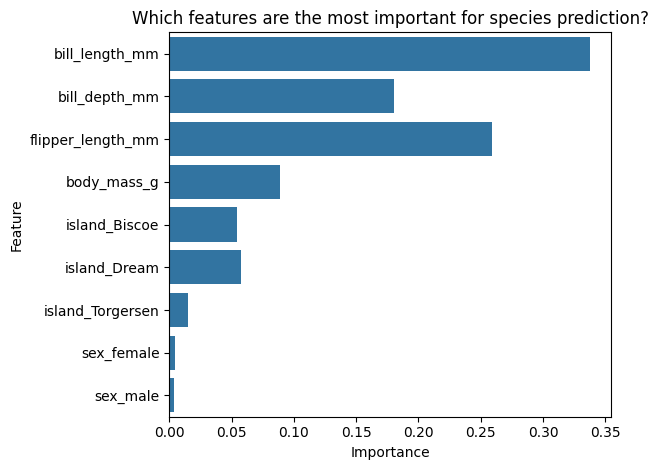

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
fig, ax = plt.subplots()
ax = sns.barplot(x=clf.feature_importances_, y=features.columns)
plt.title("Which features are the most important for species prediction?")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
fig.savefig("models/feature_importance.png")